In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt 
def extract_from_file(filename):
    with open(filename, 'r') as file:
        content = file.read()

    # 正则表达式提取数组和小数
    arrays = re.findall(r'\b(?:\d{2} {2})+\d{2}\b', content)

    data_list = []
    start_reading = False
    with open(filename, 'r') as file:
        for line in file:
            # 检查是否到达开始读取的标记行
            if line.strip() == "Num parameters: 626405":
                start_reading = True
                continue  # 跳过这一行，继续读取下一行
            # 检查是否到达结束读取的标记行
            if line.strip() == "Done predicting!":
                break  # 到达结束标记行，停止读取
            # 如果已经到达开始标记行，并且还没有到达结束标记行，则处理当前行
            if start_reading:
                # 去除行尾的换行符并分割标识串和数值
                parts = line.strip().split(' : ')
                if len(parts) == 2:
                    value = float(parts[1])  # 对应的数值
                    data_list.append( value)
    
    
    cleaned_arrays = [arr.split('  ')[0:] for arr in arrays]
    return np.array(cleaned_arrays, dtype=int), np.array(data_list, dtype=float)

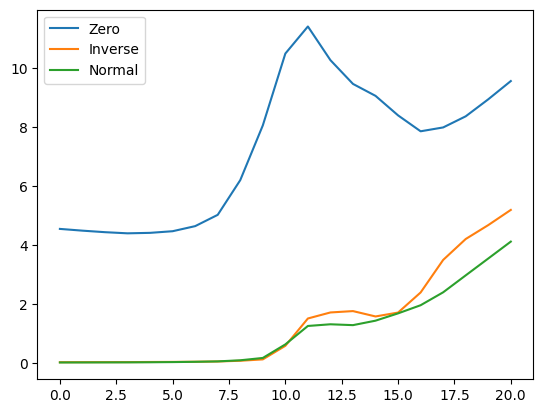

In [ ]:
max_point = 21
aca =  [5,6,4,2,1,3]
aco=[21,22,23,24,25,26]
orb_atom_dict = dict(zip(aco, aca)) 
# print(orb_atom_dict)
vfunc = np.vectorize(lambda x: orb_atom_dict[x]) # 函数向量化

Zero = []
Normal = []
Inverse = []
Zero_weight = []
Normal_weight = []
Inverse_weight = []

block_1 = (1,2,3,4)
block_2 = (5,6)

for i in range(1, max_point + 1):
    Zero_weight_single    = []
    Normal_weight_single  = []
    Inverse_weight_single = []
    active_orbial, weight = extract_from_file(f"/home/xiatao/vbnet/GraphGPS-main/IRC/{i}/{i}/0/logging.log")

    active_orbial = np.vectorize(orb_atom_dict.get)(active_orbial)
    for i in range(active_orbial.shape[0]):
        a = 0
        b = 0

        for x in active_orbial[i]:
            if x in block_1:
                a += 1
            else:
                b += 1
        if 4 - a > 2 - b:
            Normal.append(active_orbial[i])
            Normal_weight_single.append(weight[i])
        if 4 - a < 2 - b:
            Inverse.append(active_orbial[i])
            Inverse_weight_single.append(weight[i])
        if 4 - a == 2 - b:
            Zero.append(active_orbial[i])
            Zero_weight_single.append(weight[i])
    
    Normal_weight.append(sum(Normal_weight_single))
    Inverse_weight.append(sum(Inverse_weight_single))
    Zero_weight.append(sum(Zero_weight_single))

plt.plot(np.arange(len(Normal_weight)), Zero_weight, label='Zero')
plt.plot(np.arange(len(Normal_weight)), Inverse_weight, label='Inverse')
plt.plot(np.arange(len(Normal_weight)), Normal_weight,label='Normal')
plt.legend(loc='upper left', fontsize=10)
plt.savefig("IRC.pdf", dpi=600)
plt.show()
# print(len(Inverse), len(Normal), len(Zero))
# print(Zero_weight, Normal_weight, Inverse_weight)
